In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pytrends.request import TrendReq
from pprint import pprint
import string
import praw
import datetime

# Import API key
from config import reddit_id
from config import reddit_secret
from config import username
from config import password


In [5]:
# Import Reddit credentials
reddit = praw.Reddit(client_id=reddit_id,
                     client_secret=reddit_secret,
                     password=password,
                     user_agent=f"script by u/{username}",
                     username=username)
print(reddit.user.me())
# Initialize count and lists for DataFrame
count=0
timestamps=[]
timestamps_conv=[]
submission_title=[]
likes=[]


for submission in reddit.subreddit('news').search('United States Government', sort='new', time_filter='year', limit=300):
   count+=1
   print(count)
   timestamps.append(submission.created)
   print(submission.created)
   value = datetime.datetime.fromtimestamp(submission.created)
   timestamps_conv.append(value)
   print(value)
   submission_title.append(submission.title)
   print(submission.title)
   likes.append(submission.ups)
   print(submission.ups)

Admer2019
1
1536801060.0
2018-09-12 18:11:00
Possibly millions of water bottles meant for Hurricane Maria victims left on tarmac in Puerto Rico
3970
2
1533849576.0
2018-08-09 14:19:36
Puerto Rican Government Acknowledges Hurricane Death Toll of 1,427
1087
3
1532746476.0
2018-07-27 19:54:36
Mayor Jim Kenney ends Philadelphia's data-sharing contract with ICE
1631
4
1532226573.0
2018-07-21 19:29:33
China is waging a 'quiet kind of cold war' against US, top CIA expert says
2708
5
1531029880.0
2018-07-07 23:04:40
As violent protests continue over gas prices, U.S. airlines cancel all flights to Haiti
580
6
1522556018.0
2018-03-31 21:13:38
Italy On High Alert: Officials Warn of Flood of Terrorists Across the Sea
919
7
1522143790.0
2018-03-27 02:43:10
U.S. Department of Commerce Announces Reinstatement of Citizenship Question to the 2020 Decennial Census
102
8
1518572914.0
2018-02-13 17:48:34
Israel is boycotting a film festival in Paris which plans to screen "Foxtrot", an acclaimed drama whic

In [6]:
#New dictionnary names
reddit_dict={"Time Created":timestamps,
          "Time Created (Human-Readable)":timestamps_conv,
          "Title": submission_title,
          "Likes": likes}

reddit_df=pd.DataFrame(reddit_dict)
reddit_df

,Time Created,Time Created (Human-Readable),Title,Likes
0,1.536801e+09,2018-09-12 18:11:00,Possibly millions of water bottles meant for H...,3970
1,1.533850e+09,2018-08-09 14:19:36,Puerto Rican Government Acknowledges Hurricane...,1087
2,1.532746e+09,2018-07-27 19:54:36,Mayor Jim Kenney ends Philadelphia's data-shar...,1631
3,1.532227e+09,2018-07-21 19:29:33,China is waging a 'quiet kind of cold war' aga...,2708
4,1.531030e+09,2018-07-07 23:04:40,"As violent protests continue over gas prices, ...",580
5,1.522556e+09,2018-03-31 21:13:38,Italy On High Alert: Officials Warn of Flood o...,919
6,1.522144e+09,2018-03-27 02:43:10,U.S. Department of Commerce Announces Reinstat...,102
7,1.518573e+09,2018-02-13 17:48:34,Israel is boycotting a film festival in Paris ...,423
8,1.518311e+09,2018-02-10 17:05:17,A Pentagon budget like none before: $700 billion,1457
9,1.508410e+09,2017-10-19 03:40:43,Mohawk Native American tribe sues Amazon and M...,70


In [7]:
#filter out likes by median

mostliked_df = reddit_df.loc[reddit_df["Likes"] >=reddit_df["Likes"].median(), :]
#df.loc[df['shield'] > 6
mostliked_df=mostliked_df.reset_index()

In [8]:
#Sort most liked articles by time created

mostliked_df.sort_values(by=("Time Created"), ascending=False)

,index,Time Created,Time Created (Human-Readable),Title,Likes
0,0,1.536801e+09,2018-09-12 18:11:00,Possibly millions of water bottles meant for H...,3970
1,1,1.533850e+09,2018-08-09 14:19:36,Puerto Rican Government Acknowledges Hurricane...,1087
2,2,1.532746e+09,2018-07-27 19:54:36,Mayor Jim Kenney ends Philadelphia's data-shar...,1631
3,3,1.532227e+09,2018-07-21 19:29:33,China is waging a 'quiet kind of cold war' aga...,2708
4,5,1.522556e+09,2018-03-31 21:13:38,Italy On High Alert: Officials Warn of Flood o...,919
5,8,1.518311e+09,2018-02-10 17:05:17,A Pentagon budget like none before: $700 billion,1457
6,12,1.506402e+09,2017-09-25 21:54:52,Officials plead for swift aid to Puerto Rico t...,666
7,13,1.506326e+09,2017-09-25 00:52:05,US expands its controversial travel ban to inc...,4561
8,15,1.505957e+09,2017-09-20 18:22:01,Whole of Puerto Rico without power,52725


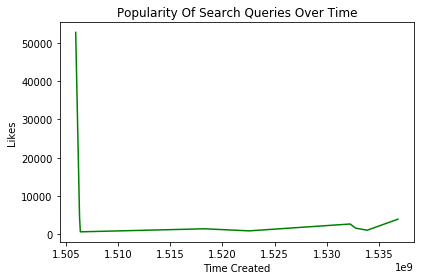

In [9]:
#Show the line graph for the popularity of search queries over time
plt.plot(mostliked_df["Time Created"], mostliked_df["Likes"], color='g')
#plt.plot(year, pop_india, color='orange')
plt.xlabel('Time Created')
plt.ylabel('Likes')
plt.title('Popularity Of Search Queries Over Time')
plt.tight_layout()
plt.show()